In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

dataset = pd.read_csv("https://raw.githubusercontent.com/Rifqi-05/pendata/main/dataR2.csv")

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [8]:
dataset.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [9]:
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


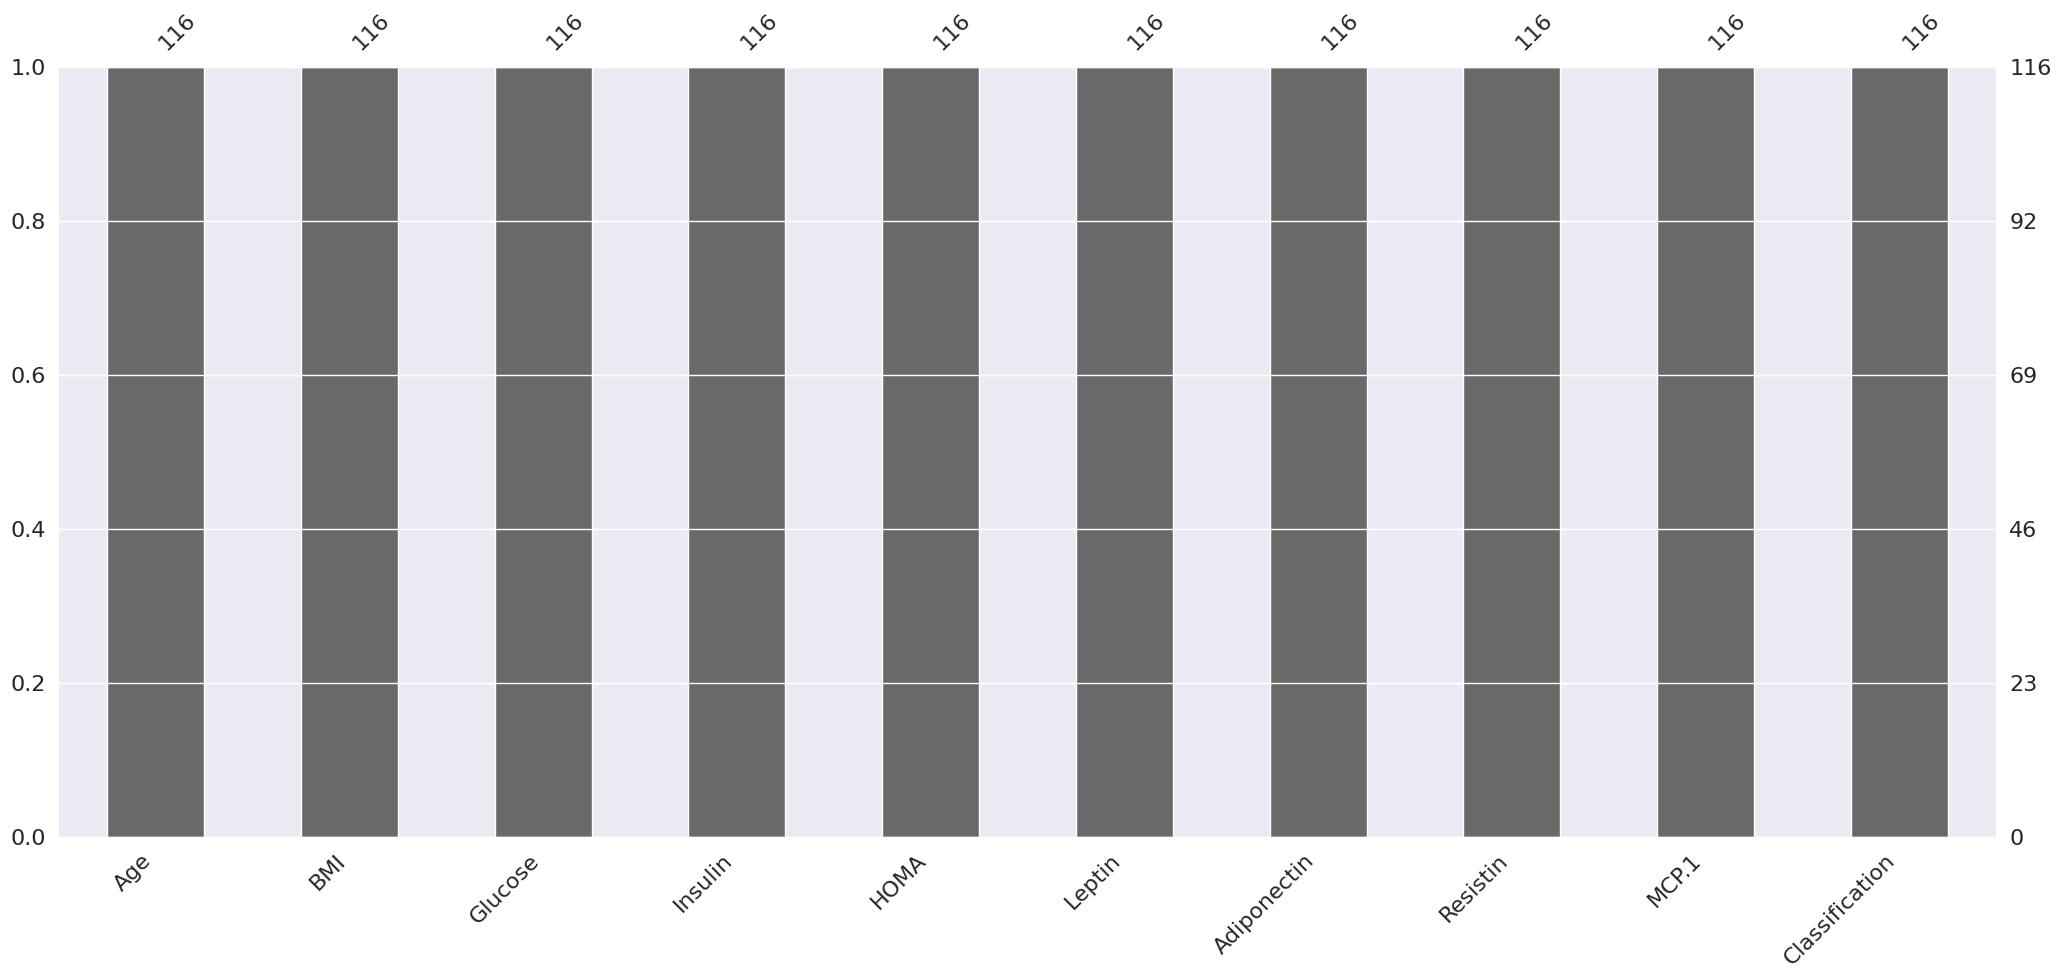

In [10]:
## null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(dataset)

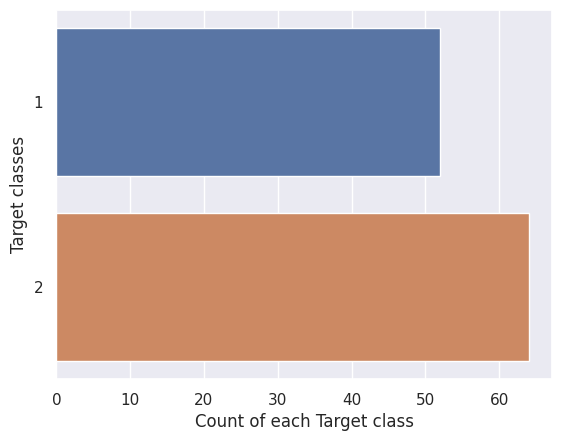

In [14]:
sns.countplot(y=dataset.Classification ,data=dataset)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

IndexError: ignored

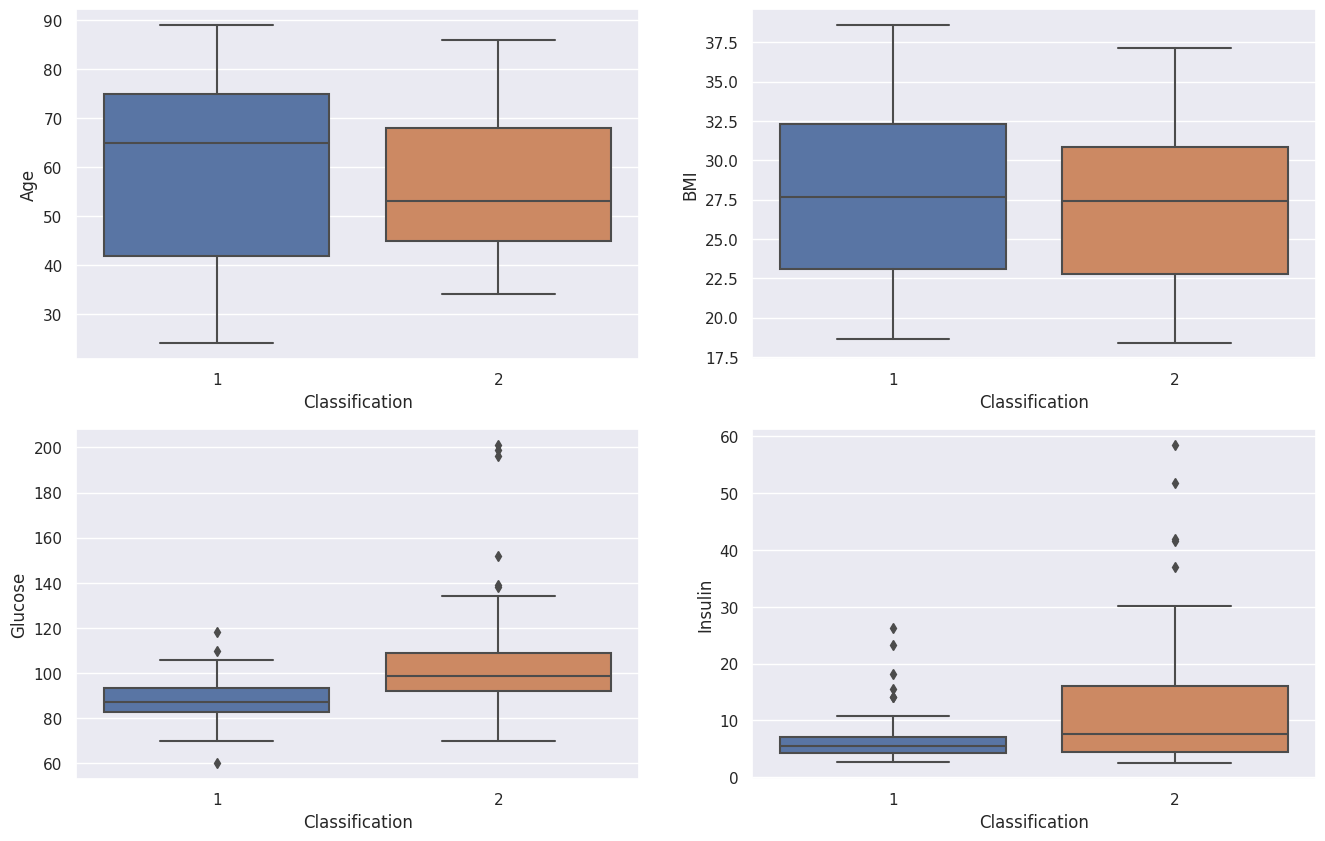

In [17]:
# memvisualisasikan distribusi data pada setiap fitur dalam dataset Iris, dengan membaginya berdasarkan spesiesnya.
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(dataset.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = dataset['Classification'], y = dataset[dataset.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

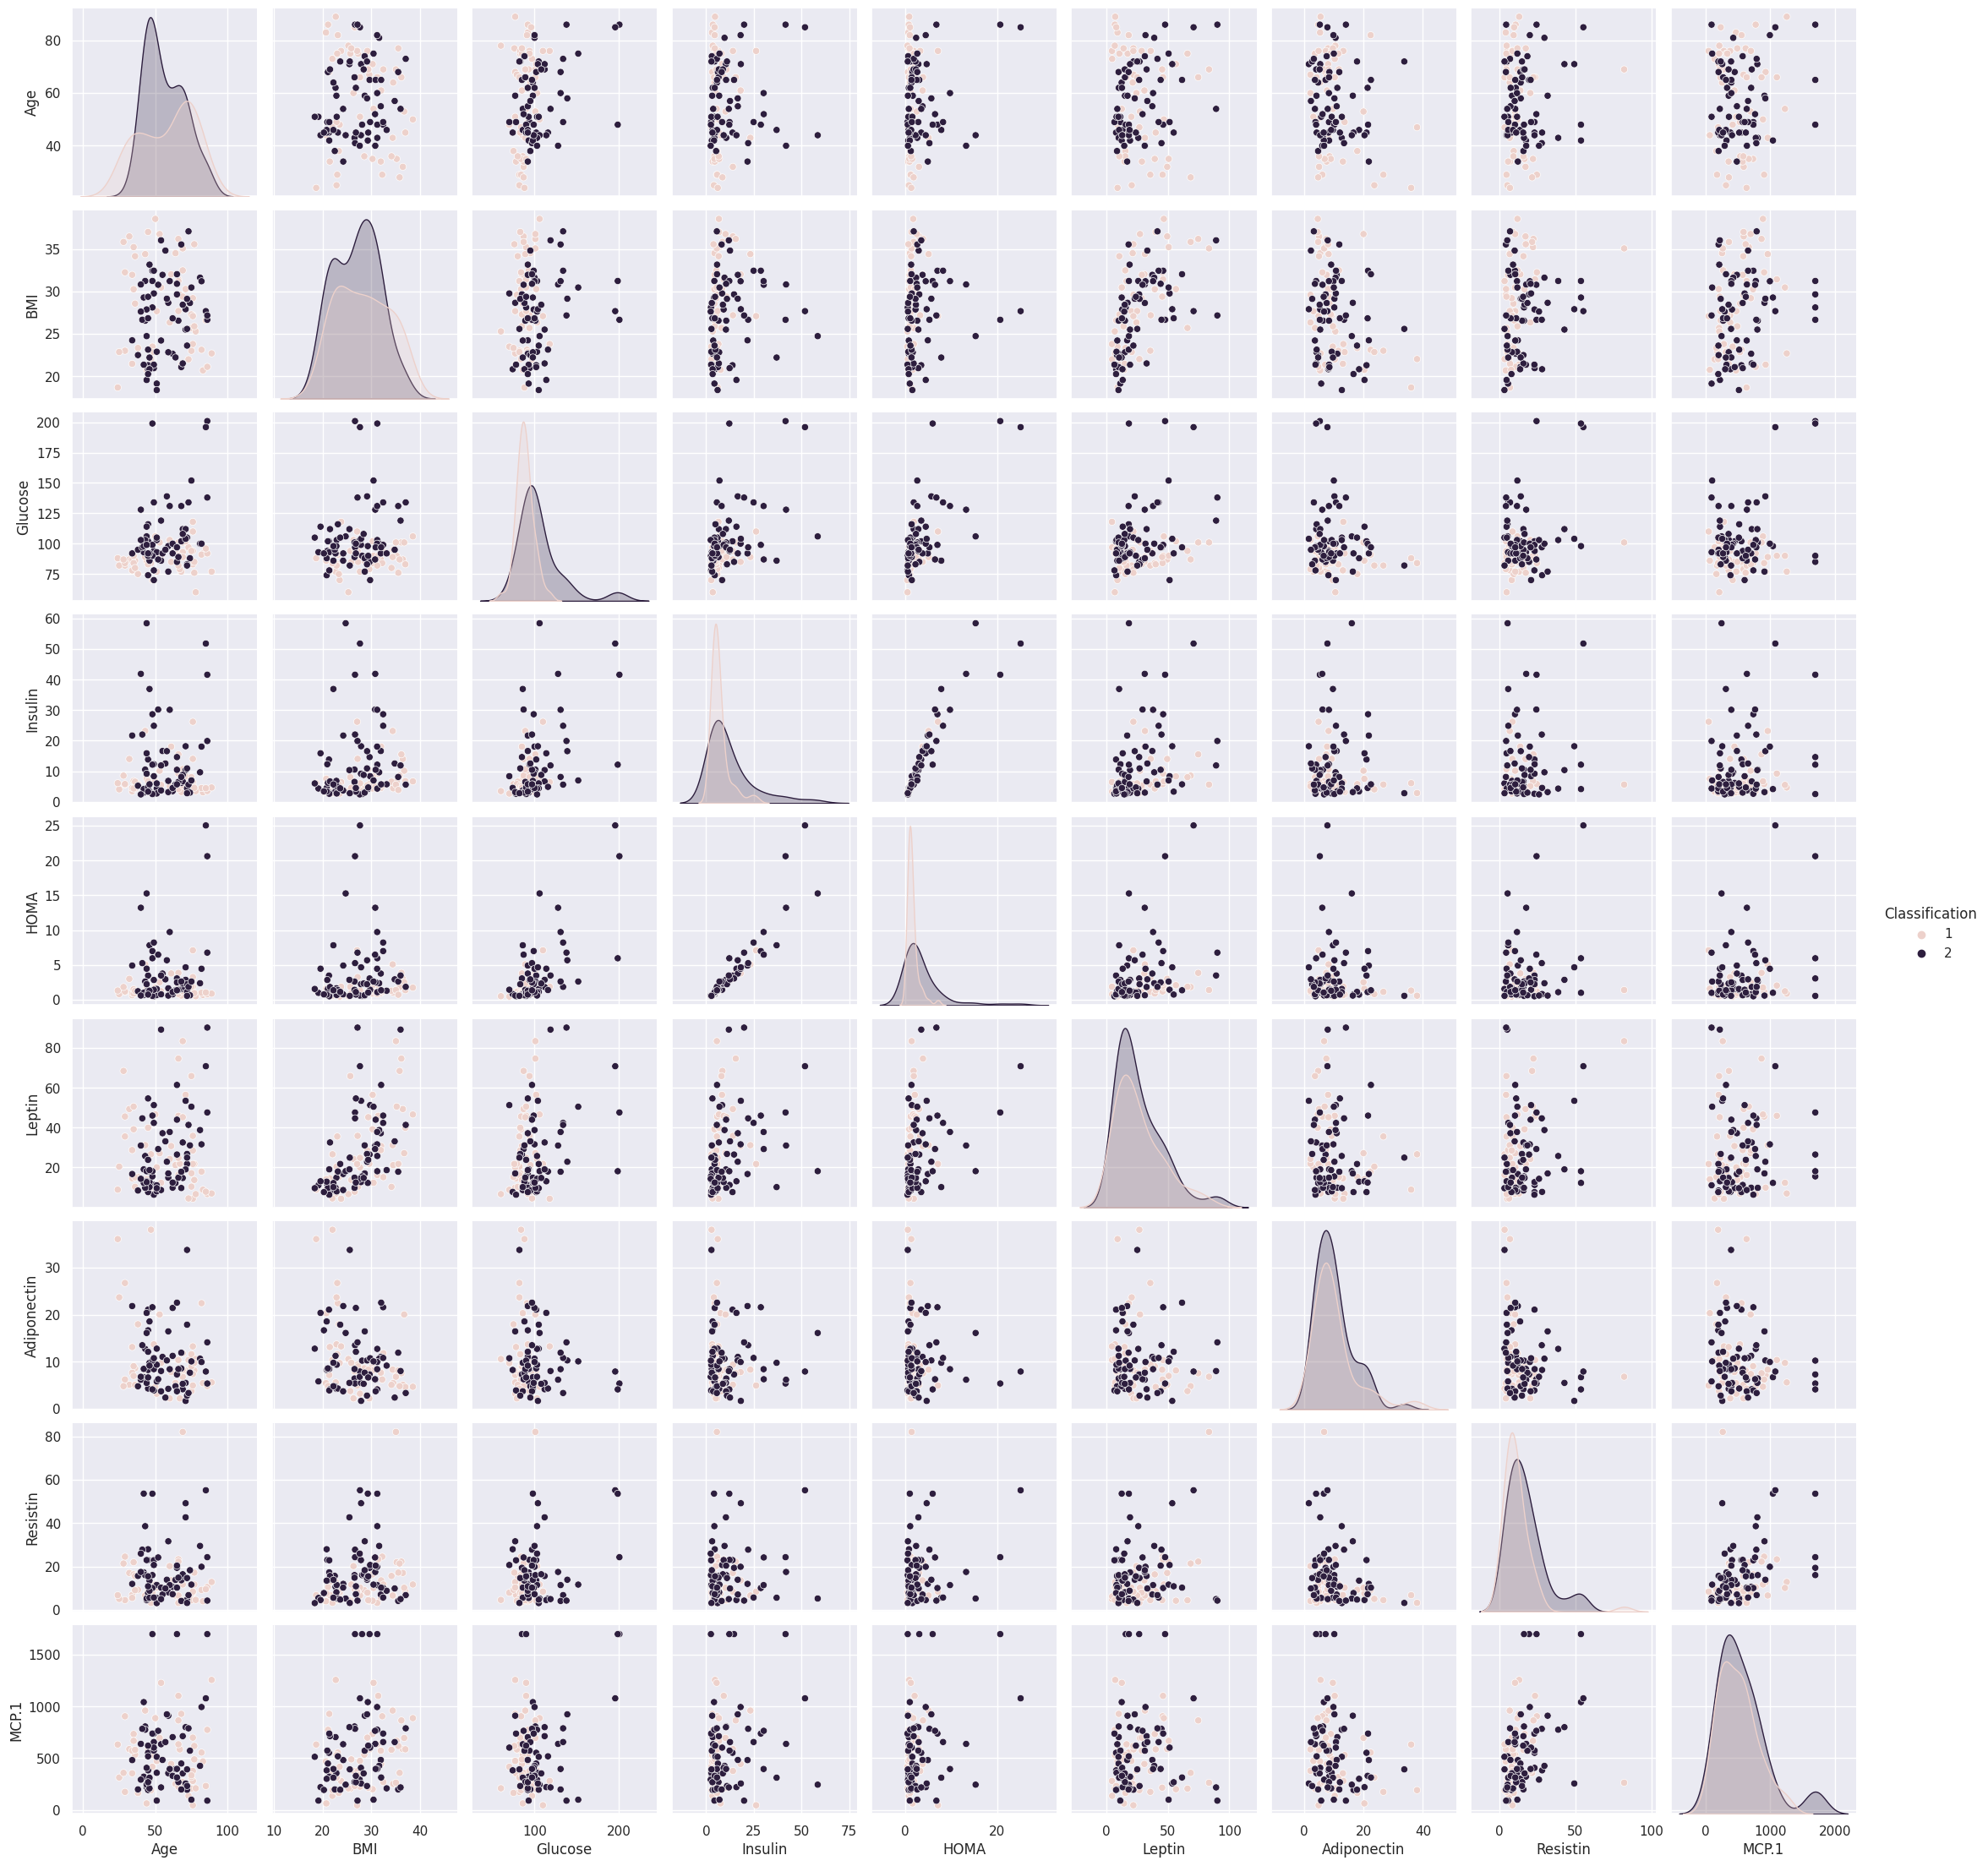

In [19]:
p=sns.pairplot(dataset, hue = 'Classification')

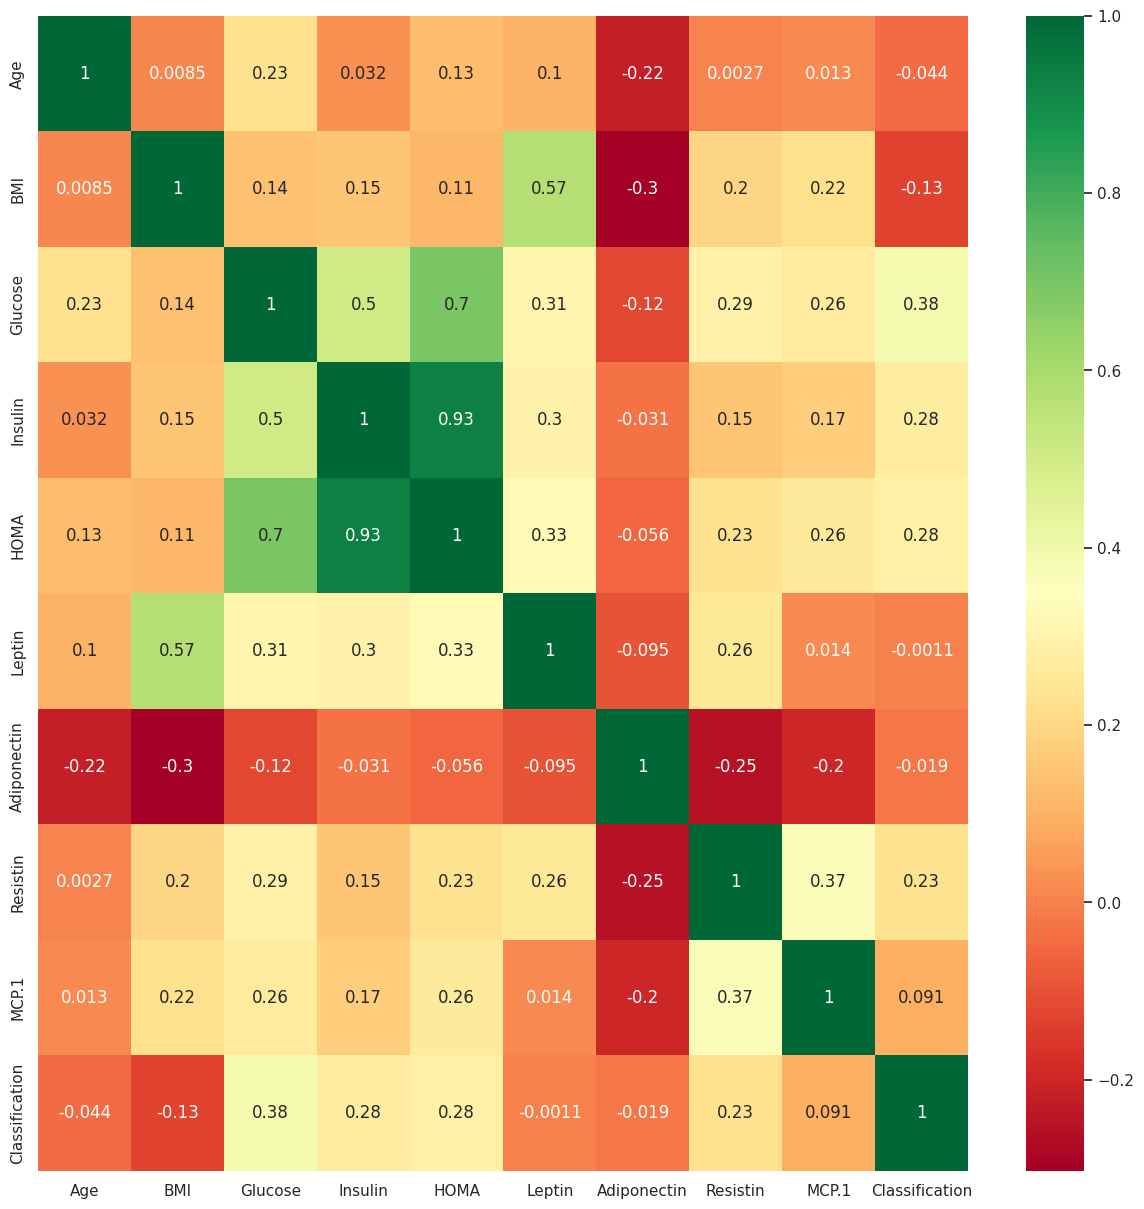

In [20]:
plt.figure(figsize=(15,15))
p=sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn')

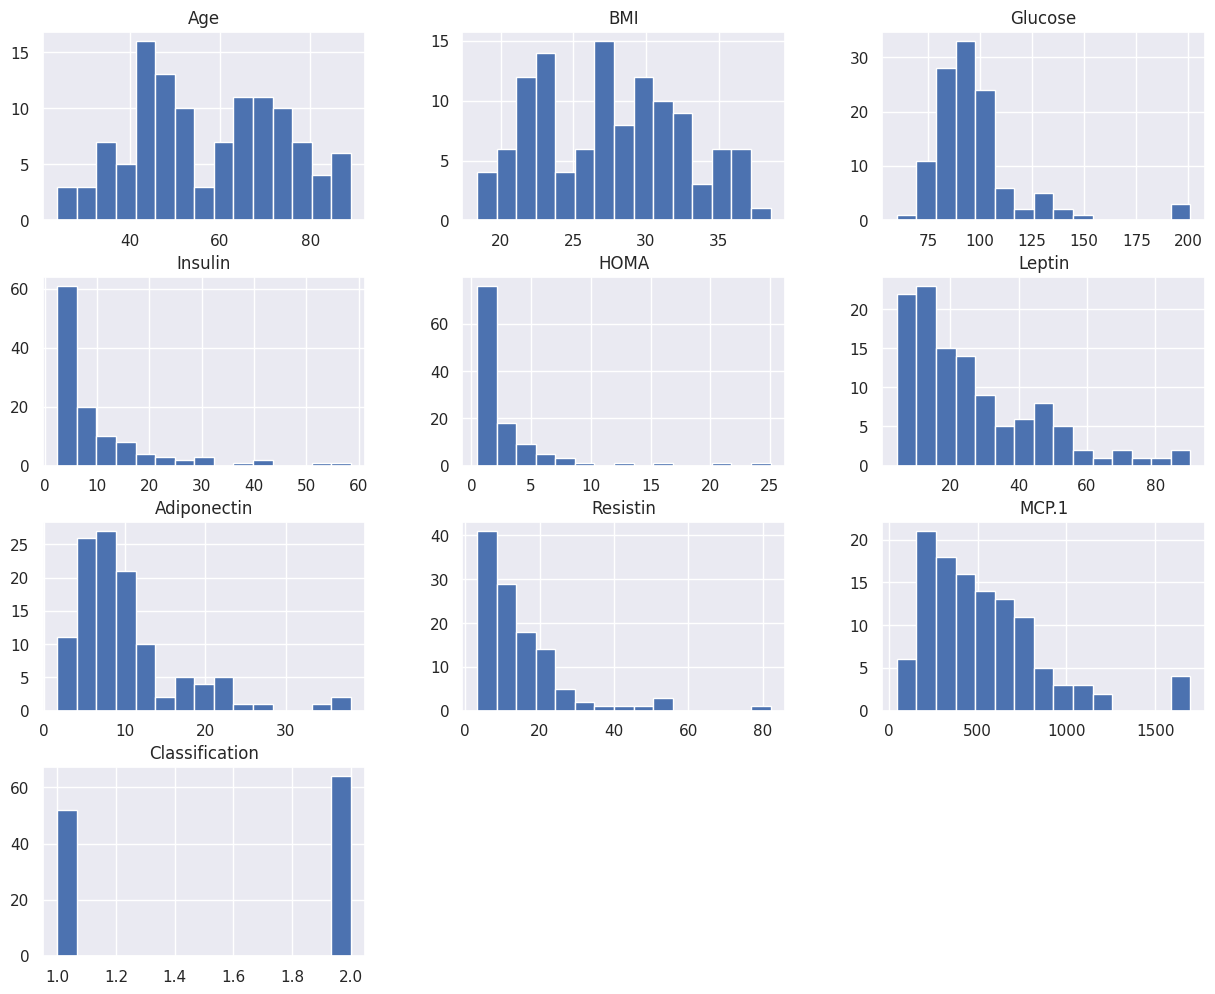

In [21]:
dataset.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

**1. Without PCA**

In [23]:
X = dataset.drop(['Classification'],axis=1)
y = dataset.Classification

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [26]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.7901234567901234 %
Test score before PCA 0.7428571428571429 %


**2. With PCA**

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [28]:
pca.get_covariance()

array([[ 0.06144881,  0.00052526,  0.0091124 ,  0.00144746,  0.00466534,
         0.0056767 , -0.01024868,  0.00010675,  0.00069848],
       [ 0.00052526,  0.06170945,  0.00551005,  0.00648568,  0.00421325,
         0.03157341, -0.01414478,  0.00762187,  0.01164924],
       [ 0.0091124 ,  0.00551005,  0.025521  ,  0.01448671,  0.01647789,
         0.01087536, -0.00366943,  0.00730974,  0.0088572 ],
       [ 0.00144746,  0.00648568,  0.01448671,  0.03228911,  0.0248169 ,
         0.01208764, -0.00105773,  0.00414116,  0.00655789],
       [ 0.00466534,  0.00421325,  0.01647789,  0.0248169 ,  0.02194941,
         0.01081731, -0.00156987,  0.00537756,  0.00804817],
       [ 0.0056767 ,  0.03157341,  0.01087536,  0.01208764,  0.01081731,
         0.04979235, -0.00400347,  0.00898027,  0.0006543 ],
       [-0.01024868, -0.01414478, -0.00366943, -0.00105773, -0.00156987,
        -0.00400347,  0.03537659, -0.00745515, -0.0079012 ],
       [ 0.00010675,  0.00762187,  0.00730974,  0.00414116,  0

In [29]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.31421633, 0.18103488, 0.15761684, 0.13537259, 0.07412668,
       0.06414567, 0.03716828, 0.03405289, 0.00226583])

In [31]:
pca=PCA(n_components=4)
X_new=pca.fit_transform(X)

In [32]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [36]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.7407407407407407 %
Test score after PCA 0.7428571428571429 %
